In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

In [3]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "dataset","Train")
valid_path = os.path.join(current_directory, "dataset","Valid")
test_path = os.path.join(current_directory, "dataset","Test")

Current Working Directory: c:\Users\TRUPTI-PARAB\Desktop\PLD


## Parameter Breakdown

### `train_path`
- **Description**: The path to the directory containing the training images.
- **Details**: This directory should have subdirectories, with each subdirectory named after a class label, containing images of that class.

---

### `labels="inferred"`
- **Description**: The labels for the images are inferred from the subdirectory names in the `train_path`.
- **Example**: If `train_path` contains subdirectories `cats` and `dogs`, labels will be assigned as `cats = 0` and `dogs = 1` (or similar).

---

### `label_mode="categorical"`
- **Description**: Specifies the type of labels.
  - `"categorical"`: Labels are returned as one-hot encoded vectors.
  - `"int"`: Labels are returned as integers.
  - `None`: No labels are returned.
- **Details**: Here, labels are one-hot encoded, useful for classification tasks.

---

### `class_names=None`
- **Description**: Automatically determines class names from the subdirectory names.
- **Details**: You can specify a list like `['cats', 'dogs']` to manually define the class names.

---

### `color_mode="rgb"`
- **Description**: Specifies the image color mode.
  - `"rgb"`: Loads 3-channel color images.
  - `"grayscale"`: Loads single-channel grayscale images.
  - `"rgba"`: Loads 4-channel color images.
- **Details**: Here, images are loaded in RGB mode.

---

### `batch_size=32`
- **Description**: The number of images to be processed in a single batch during training.
- **Details**: Affects memory usage and training speed.

---

### `image_size=(128, 128)`
- **Description**: Resizes all images to the specified dimensions (128x128 pixels in this case).
- **Details**: Helps standardize input dimensions for the neural network.

---

### `shuffle=True`
- **Description**: Randomly shuffles the images before creating batches.
- **Details**: Helps reduce overfitting and ensures a diverse input distribution.

---

### `seed=None`
- **Description**: Used to set a random seed for reproducibility of the shuffle.
- **Details**: If `None`, results may vary across runs.

---

### `validation_split=None`
- **Description**: Specifies the fraction of data to be set aside for validation.
- **Example**: `validation_split=0.2` reserves 20% of data for validation.

---

### `subset=None`
- **Description**: Specifies whether this dataset is for training or validation when `validation_split` is set.
- **Options**: `"training"` or `"validation"`.
- **Details**: Must be used with `validation_split`.

---

### `interpolation="bilinear"`
- **Description**: Method used to resize the images.
- **Options**: `"nearest"`, `"bilinear"`, `"bicubic"`, etc.
- **Details**: `"bilinear"` is smooth and works well for resizing.

---

### `follow_links=False`
- **Description**: If `True`, follows symbolic links to access images.

---

### `crop_to_aspect_ratio=False`
- **Description**: If `True`, crops images to maintain their original aspect ratio before resizing.
- **Details**: If `False`, images are resized to `image_size` directly.


In [11]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 865 files belonging to 3 classes.


In [12]:
# Get the class labels
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [13]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 300 files belonging to 3 classes.


In [14]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [18]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/3


28/28 [==============================] - 415s 15s/step - loss: 0.0804 - accuracy: 0.9734 - val_loss: 0.1165 - val_accuracy: 0.9600
Epoch 2/3
28/28 [==============================] - 444s 16s/step - loss: 0.0615 - accuracy: 0.9803 - val_loss: 0.2065 - val_accuracy: 0.9267
Epoch 3/3
28/28 [==============================] - 343s 12s/step - loss: 0.0999 - accuracy: 0.9595 - val_loss: 0.1215 - val_accuracy: 0.9533


In [19]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

28/28 [==============================] - 92s 3s/step - loss: 0.0538 - accuracy: 0.9827
Training accuracy: 0.9826589822769165


In [20]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

10/10 [==============================] - 35s 3s/step - loss: 0.1215 - accuracy: 0.9533
Validation accuracy: 0.95333331823349


In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history

{'loss': [0.08035481721162796, 0.061512984335422516, 0.09985923767089844],
 'accuracy': [0.973410427570343, 0.9803467988967896, 0.9595375657081604],
 'val_loss': [0.116522878408432, 0.20650269091129303, 0.12149825692176819],
 'val_accuracy': [0.9599999785423279, 0.9266666769981384, 0.95333331823349]}

ValueError: x and y must have same first dimension, but have shapes (10,) and (3,)

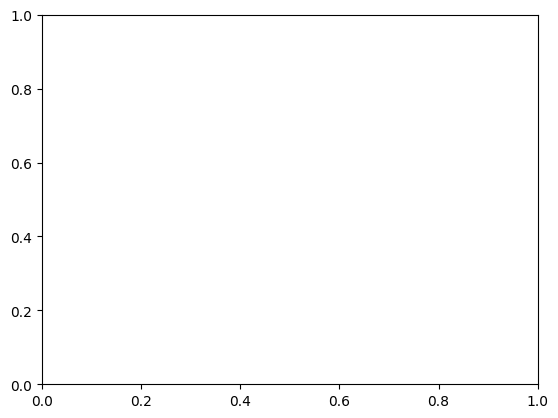

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()